In [1]:
import os

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
print(sys.executable)

c:\Users\adi76\anaconda3\envs\churn-env\python.exe


In [4]:
df=pd.read_csv("ecommerce_customer_churn_dataset.csv")

In [5]:
df.head(5)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [7]:
for column in df.columns:
    print("{}:{}".format(column,df[column].dtype))   # useful in making the schema.yaml file

Age:float64
Gender:object
Country:object
City:object
Membership_Years:float64
Login_Frequency:float64
Session_Duration_Avg:float64
Pages_Per_Session:float64
Cart_Abandonment_Rate:float64
Wishlist_Items:float64
Total_Purchases:float64
Average_Order_Value:float64
Days_Since_Last_Purchase:float64
Discount_Usage_Rate:float64
Returns_Rate:float64
Email_Open_Rate:float64
Customer_Service_Calls:float64
Product_Reviews_Written:float64
Social_Media_Engagement_Score:float64
Mobile_App_Usage:float64
Payment_Method_Diversity:float64
Lifetime_Value:float64
Credit_Balance:float64
Churned:int64
Signup_Quarter:object


In [8]:
df.shape

(50000, 25)

In [9]:
df.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter'],
      dtype='object')

Information about columns used in the data sets:


Few general observations:
There are few missing values observed in the data, we will so analysis column wise

In [10]:
df.duplicated().sum()  # there is no duplicated rows in the datasets

np.int64(0)

## AGE


In [11]:
df['Age'].value_counts()

Age
18.0     2639
38.0     1638
37.0     1627
40.0     1570
39.0     1564
         ... 
5.0        16
10.0       14
74.0       11
200.0      11
150.0       9
Name: count, Length: 62, dtype: int64

In [12]:
df['Age'].isnull().sum()

np.int64(2495)

Observation in the AGE column:  

-- There are 2495 rows missing in the age column  

-- we may fill those missing values with the median column  

-- The distrubution looks nearly normal, even the log transformed also looks nearly normal so lets keep the actual age  

-- Median age of the people is around 35-38 years depending on the different country  

-- Most of the customer are from the age 25-50(comparitevely youger people)  

-- The youner gen is more likely to churn as per the data observation (may be pricing related issue)  

-- All the age group has similar life time value


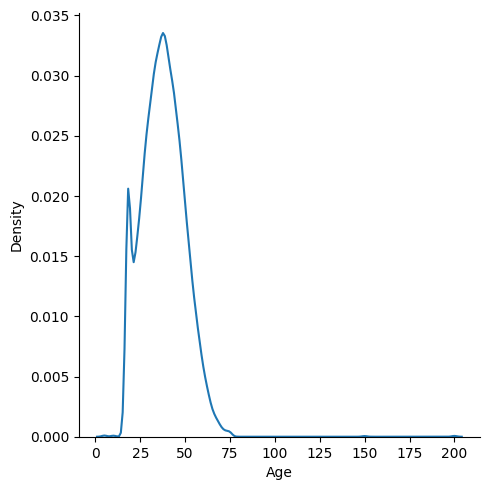

In [13]:
sns.displot(data=df,x=df['Age'],kind='kde')

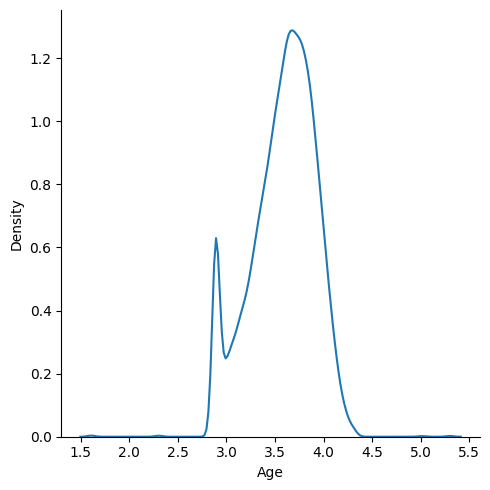

In [14]:
sns.displot(data=df,x=np.log(df['Age']),kind='kde')

In [15]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [16]:
df['Age'].isnull().sum() # Now there is no missing value

np.int64(0)

In [17]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
50000 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [18]:
df['Age']=pd.to_numeric(df['Age'],errors='coerce').astype('Int32')

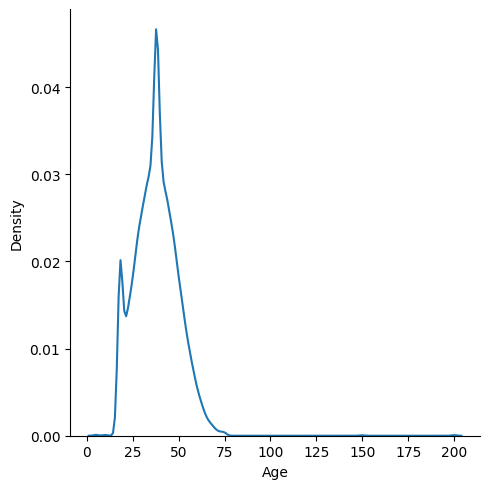

In [19]:
sns.displot(data=df,x=df['Age'],kind='kde')

In [20]:
df.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter'],
      dtype='object')

In [21]:
print(df.groupby("Gender")[['Age']].mean())

              Age
Gender           
Female   37.82326
Male    37.802397
Other   37.798292


In [22]:
print(df.groupby("Gender")[['Age']].median())

         Age
Gender      
Female  38.0
Male    38.0
Other   38.0


In [23]:
print(df.groupby(["Gender","Country"])[['Age']].median())

                   Age
Gender Country        
Female Australia  38.0
       Canada     38.0
       France     38.0
       Germany    38.0
       India      38.0
       Japan      38.0
       UK         38.0
       USA        38.0
Male   Australia  38.0
       Canada     38.0
       France     38.0
       Germany    38.0
       India      38.0
       Japan      38.0
       UK         38.0
       USA        38.0
Other  Australia  38.0
       Canada     38.0
       France     39.0
       Germany    38.0
       India      38.0
       Japan      38.0
       UK         38.0
       USA        37.0


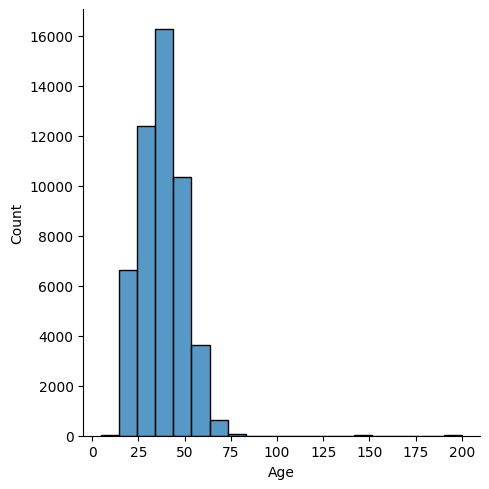

In [24]:
sns.displot(data=df, x='Age', kind='hist',bins=20) # Most customers are from which age group?


In [25]:
df['Age_group']=df['Age'].apply(lambda x: "young" if x<25 else "Middle" if 25<x<=55 else "Senior")

In [26]:
print(df.groupby("Age_group")['Churned'].mean())  # which age group is more likely to churn

Age_group
Middle    0.259003
Senior    0.258663
young     0.484176
Name: Churned, dtype: float64


In [27]:
print(df.groupby(["Age_group","Country"])['Churned'].mean())  # which age group is more likely to churn country wise

Age_group  Country  
Middle     Australia    0.263326
           Canada       0.265836
           France       0.241086
           Germany      0.253704
           India        0.260712
           Japan        0.253656
           UK           0.254707
           USA          0.263593
Senior     Australia    0.290230
           Canada       0.255578
           France       0.258258
           Germany      0.280303
           India        0.270769
           Japan        0.239437
           UK           0.257895
           USA          0.246479
young      Australia    0.496552
           Canada       0.482368
           France       0.479452
           Germany      0.488270
           India        0.491917
           Japan        0.440341
           UK           0.499016
           USA          0.480209
Name: Churned, dtype: float64


In [28]:
df.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group'],
      dtype='object')

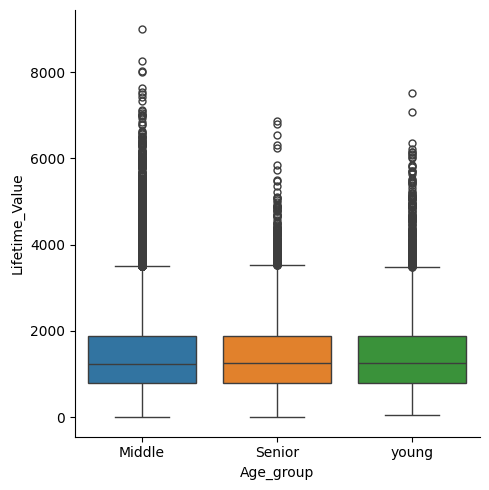

In [29]:
sns.catplot(data=df,x="Age_group",y='Lifetime_Value',kind='box',hue="Age_group") # Which age group provides higher life time value

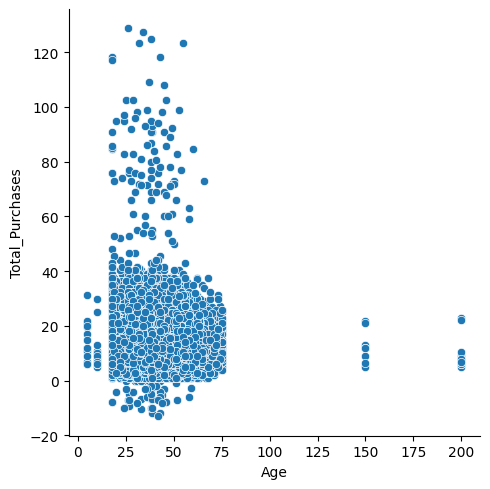

In [30]:
sns.relplot(data=df,x="Age",y="Total_Purchases",kind='scatter')

In [31]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Age_group
0,43,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1,Middle
1,36,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4,Middle
2,45,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4,Middle
3,56,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1,Senior
4,35,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4,Middle


## Gender

Almost equal number of male and female  
all genders has almost equal churn rate
Gender is categorical variable need to perforn one hot encoding

In [32]:
df['Gender'].value_counts()

Gender
Female    25116
Male      23947
Other       937
Name: count, dtype: int64

In [33]:
df['Gender'].isnull().sum() # No null values observed in the Gender column

np.int64(0)

In [34]:
df.groupby("Gender")['Churned'].mean() 

Gender
Female    0.289736
Male      0.287301
Other     0.312700
Name: Churned, dtype: float64

In [35]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [36]:
df.head()

,Age,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,...,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Age_group,Gender_Male,Gender_Other
0,43,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,9.0,...,16.3,20.8,1.0,953.33,2278.0,0,Q1,Middle,True,False
1,36,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,19.5,...,NaN,23.3,3.0,1067.47,3028.0,0,Q4,Middle,True,False
2,45,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,9.1,...,NaN,8.8,NaN,1289.75,2317.0,0,Q4,Middle,False,False
3,56,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,15.0,...,85.9,31.0,3.0,2340.92,2674.0,0,Q1,Senior,False,False
4,35,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,32.5,...,83.0,50.4,4.0,3041.29,5354.0,0,Q4,Middle,True,False


## Country

It is observed that most customer from USA or may be most data taken from USA

In [37]:
df['Country'].value_counts() 

Country
USA          17384
UK            7534
Canada        6023
Germany       4925
Australia     4061
France        4013
India         3512
Japan         2548
Name: count, dtype: int64

In [38]:
df['Country'].isnull().sum() # No null value about the country

np.int64(0)

In [39]:
df=pd.get_dummies(df,columns=['Country'],drop_first=True) # Categorical column to one hot encoding

In [40]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Membership Years

No null values observed, almost normally distributed 

In [41]:
df['Membership_Years']

0         2.9
1         1.6
2         2.9
3         2.6
4         3.1
         ... 
49995    10.0
49996     1.4
49997     2.8
49998     2.9
49999     2.2
Name: Membership_Years, Length: 50000, dtype: float64

In [42]:
df['Membership_Years'].isnull().sum() # No null values 

np.int64(0)

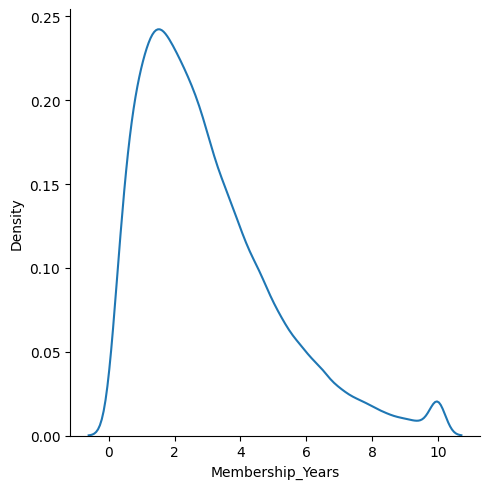

In [43]:
sns.displot(data=df,x='Membership_Years',kind='kde')

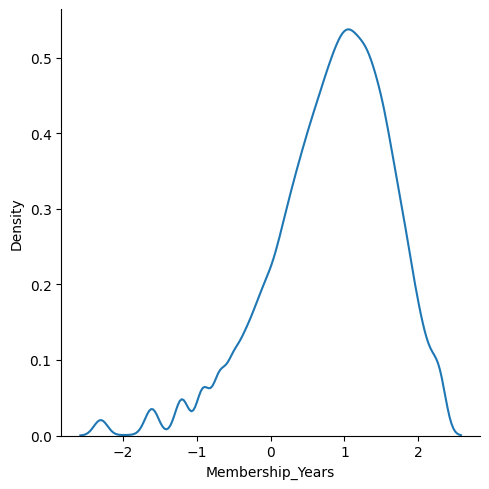

In [44]:
sns.displot(data=df,x=np.log(df['Membership_Years']),kind='kde')

In [45]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## City

The number of cities are more so ignoring this to take into our model

In [46]:
df['City'].nunique() # there are 40 unique cities

40

## Login frequency

Here also no null values are observed  
The log transformed column looks more normally distributed

In [47]:
df['Login_Frequency'].isnull().sum() # no null values found here

np.int64(0)

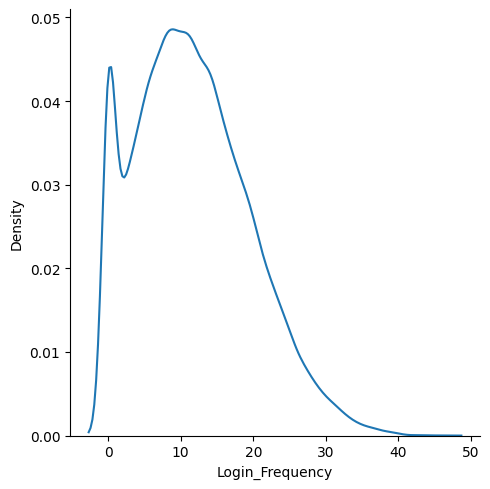

In [48]:
sns.displot(data=df,x=df['Login_Frequency'],kind='kde')

c:\Users\adi76\anaconda3\envs\churn-env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


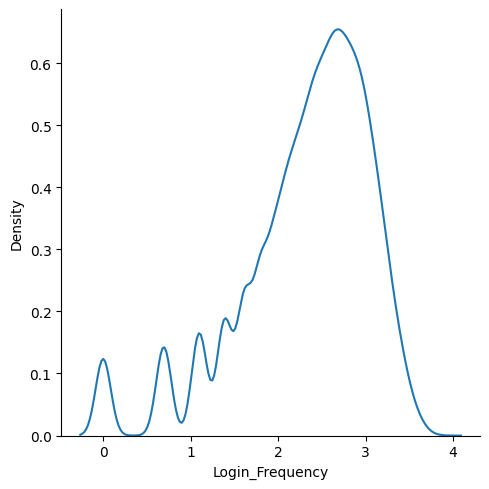

In [49]:
sns.displot(data=df,x=np.log(df['Login_Frequency']),kind='kde')

In [50]:
df.groupby('Age_group')[['Login_Frequency']].mean() # Almost same login frequency of different age group

,Login_Frequency
Age_group,
Middle,11.599771
Senior,11.597853
young,11.787611


In [51]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Session duration avg

Filled missing values with the mean  
almost looks like normally distributed  


In [52]:
df['Session_Duration_Avg'].isnull().sum() # Some null values observed

np.int64(3399)

In [53]:
df['Session_Duration_Avg']=df['Session_Duration_Avg'].fillna(df['Session_Duration_Avg'].mean())

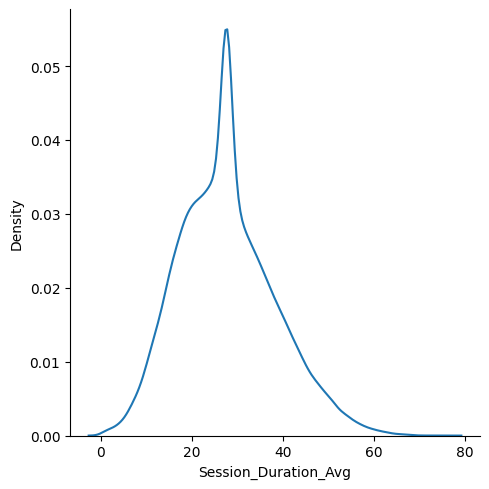

In [54]:
sns.displot(data=df,x=df['Session_Duration_Avg'],kind='kde')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  Int32  
 1   City                           50000 non-null  object 
 2   Membership_Years               50000 non-null  float64
 3   Login_Frequency                50000 non-null  float64
 4   Session_Duration_Avg           50000 non-null  float64
 5   Pages_Per_Session              47000 non-null  float64
 6   Cart_Abandonment_Rate          50000 non-null  float64
 7   Wishlist_Items                 46000 non-null  float64
 8   Total_Purchases                50000 non-null  float64
 9   Average_Order_Value            50000 non-null  float64
 10  Days_Since_Last_Purchase       47000 non-null  float64
 11  Discount_Usage_Rate            46500 non-null  float64
 12  Returns_Rate                   45509 non-null 

In [56]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Page per session

Filled missing values with mean  
data looks almost normally distributed

In [57]:
df['Pages_Per_Session'].isnull().sum() # There are few missing values which needed to filled

np.int64(3000)

In [58]:
df['Pages_Per_Session']=df['Pages_Per_Session'].fillna(df['Pages_Per_Session'].mean())

In [59]:
df['Pages_Per_Session'].isnull().sum()

np.int64(0)

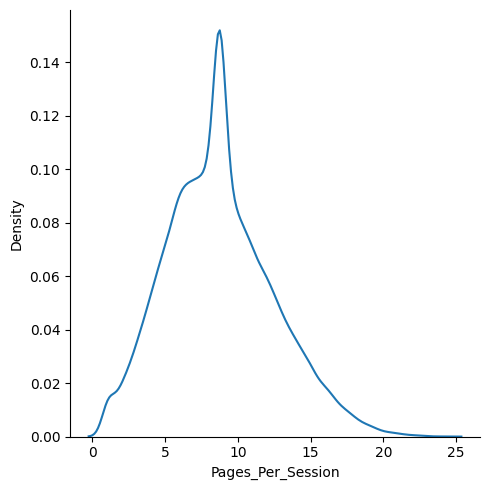

In [60]:
sns.displot(data=df,x=df['Pages_Per_Session'],kind='kde') 

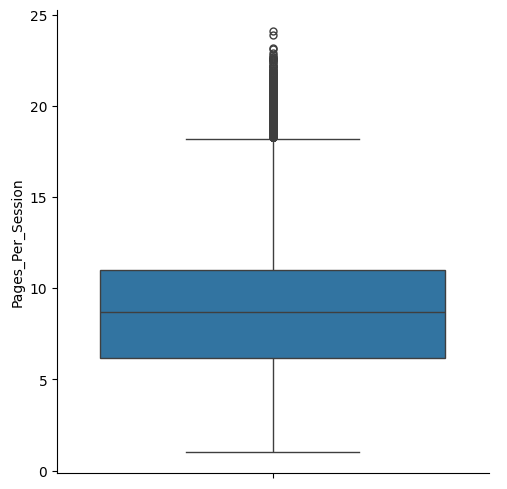

In [61]:
sns.catplot(data=df,y=df['Pages_Per_Session'],kind='box',)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  Int32  
 1   City                           50000 non-null  object 
 2   Membership_Years               50000 non-null  float64
 3   Login_Frequency                50000 non-null  float64
 4   Session_Duration_Avg           50000 non-null  float64
 5   Pages_Per_Session              50000 non-null  float64
 6   Cart_Abandonment_Rate          50000 non-null  float64
 7   Wishlist_Items                 46000 non-null  float64
 8   Total_Purchases                50000 non-null  float64
 9   Average_Order_Value            50000 non-null  float64
 10  Days_Since_Last_Purchase       47000 non-null  float64
 11  Discount_Usage_Rate            46500 non-null  float64
 12  Returns_Rate                   45509 non-null 

In [63]:
df['Cart_Abandonment_Rate']

0        50.6
1        37.7
2        70.9
3        41.7
4        19.1
         ... 
49995    51.2
49996    32.5
49997    50.6
49998    60.8
49999    46.0
Name: Cart_Abandonment_Rate, Length: 50000, dtype: float64

In [64]:
df['Cart_Abandonment_Rate'].isnull().sum() # No missing values

np.int64(0)

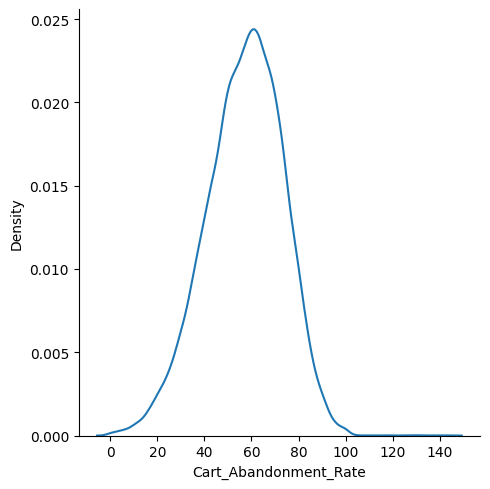

In [65]:
sns.displot(data=df,x=df['Cart_Abandonment_Rate'],kind='kde') # Nornally distributed

In [66]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Whislist Items

Missing filled with mean  
Distribution is not normal, it looks like distorted one  
Later we may decide whether we want to proceed with this column or drop from the model  

In [67]:
df['Wishlist_Items']

0        3.0
1        1.0
2        1.0
3        9.0
4        9.0
        ... 
49995    3.0
49996    2.0
49997    1.0
49998    1.0
49999    0.0
Name: Wishlist_Items, Length: 50000, dtype: float64

In [68]:
df['Wishlist_Items'].isnull().sum()

np.int64(4000)

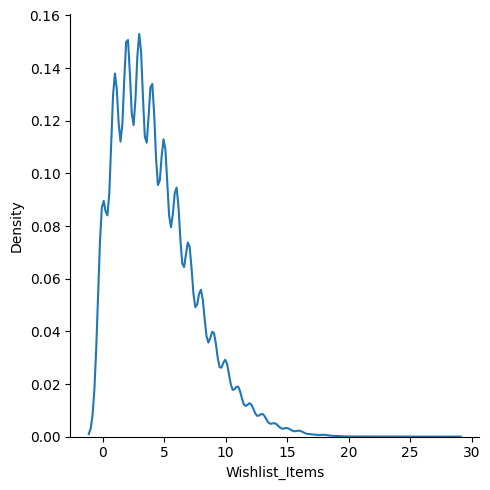

In [69]:
sns.displot(data=df,x=df['Wishlist_Items'],kind='kde')

In [70]:
df['Wishlist_Items']=df['Wishlist_Items'].fillna(df['Wishlist_Items'].mean())

c:\Users\adi76\anaconda3\envs\churn-env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


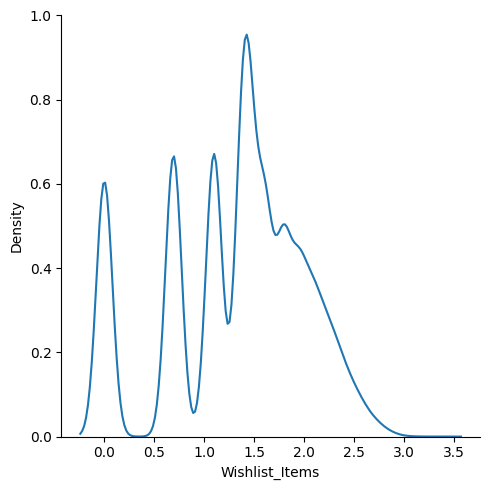

In [71]:
sns.displot(data=df,kind='kde',x=np.log(df['Wishlist_Items'])) # Log trnasformed not working 

In [72]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

In [73]:
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.max_colwidth', None)

In [74]:
df.info(verbose=True,max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  Int32  
 1   City                           50000 non-null  object 
 2   Membership_Years               50000 non-null  float64
 3   Login_Frequency                50000 non-null  float64
 4   Session_Duration_Avg           50000 non-null  float64
 5   Pages_Per_Session              50000 non-null  float64
 6   Cart_Abandonment_Rate          50000 non-null  float64
 7   Wishlist_Items                 50000 non-null  float64
 8   Total_Purchases                50000 non-null  float64
 9   Average_Order_Value            50000 non-null  float64
 10  Days_Since_Last_Purchase       47000 non-null  float64
 11  Discount_Usage_Rate            46500 non-null  float64
 12  Returns_Rate                   45509 non-null 

In [75]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  Int32  
 1   City                           50000 non-null  object 
 2   Membership_Years               50000 non-null  float64
 3   Login_Frequency                50000 non-null  float64
 4   Session_Duration_Avg           50000 non-null  float64
 5   Pages_Per_Session              50000 non-null  float64
 6   Cart_Abandonment_Rate          50000 non-null  float64
 7   Wishlist_Items                 50000 non-null  float64
 8   Total_Purchases                50000 non-null  float64
 9   Average_Order_Value            50000 non-null  float64
 10  Days_Since_Last_Purchase       47000 non-null  float64
 11  Discount_Usage_Rate            46500 non-null  float64
 12  Returns_Rate                   45509 non-null 

## Total Purchase

No missing values  
Almost normally distributed  
few negatives data in the total purchase  

In [76]:
df['Total_Purchases'].isnull().sum()

np.int64(0)

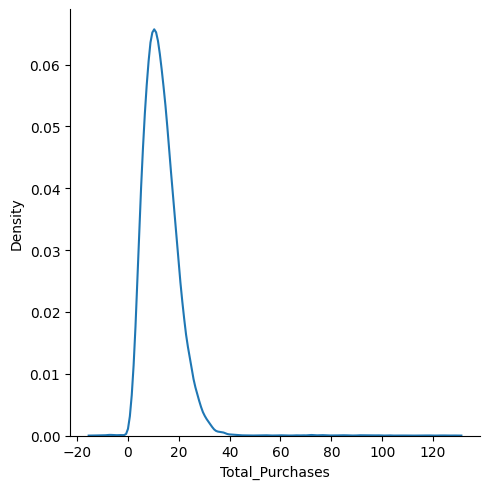

In [77]:
sns.displot(data=df,x=df['Total_Purchases'],kind='kde')

In [78]:
df[df['Total_Purchases']<0].shape  # There are 40 entry where total purchase is negative

(40, 33)

## Average oder value

No missing values observed  
data shows highly skewed  
It seems there are a lot of outliers  

In [79]:
df['Average_Order_Value']

0         94.72
1         82.45
2        165.52
3        147.33
4        141.30
          ...  
49995    156.76
49996    103.31
49997    139.44
49998    111.58
49999    132.67
Name: Average_Order_Value, Length: 50000, dtype: float64

In [80]:
df['Average_Order_Value'].isnull().sum()

np.int64(0)

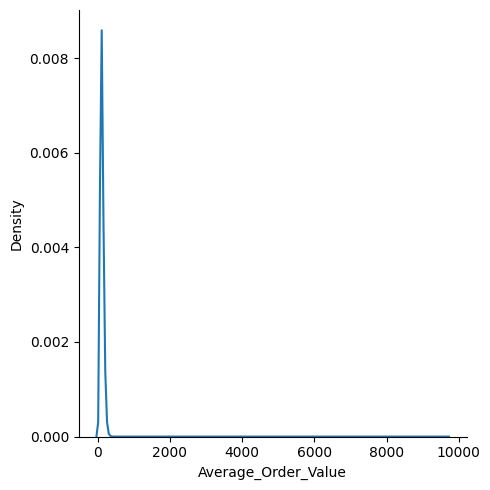

In [81]:
sns.displot(data=df,x=df['Average_Order_Value'],kind='kde')

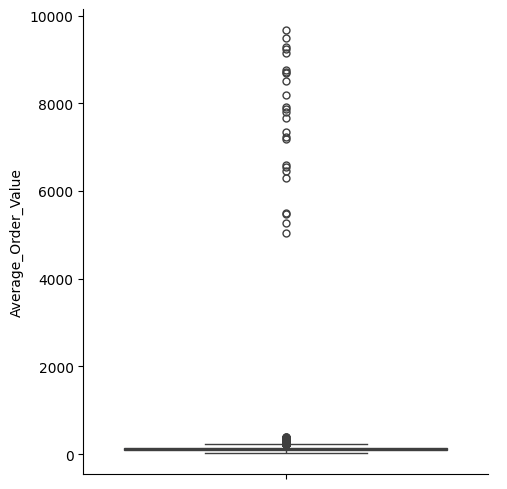

In [82]:
sns.catplot(data=df,y=df['Average_Order_Value'],kind='box')

In [83]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

In [84]:
df['Days_Since_Last_Purchase']

0        34.0
1        71.0
2        11.0
3        47.0
4        73.0
         ... 
49995    18.0
49996    48.0
49997     7.0
49998    72.0
49999    37.0
Name: Days_Since_Last_Purchase, Length: 50000, dtype: float64

In [85]:
df['Days_Since_Last_Purchase'].isnull().sum()

np.int64(3000)

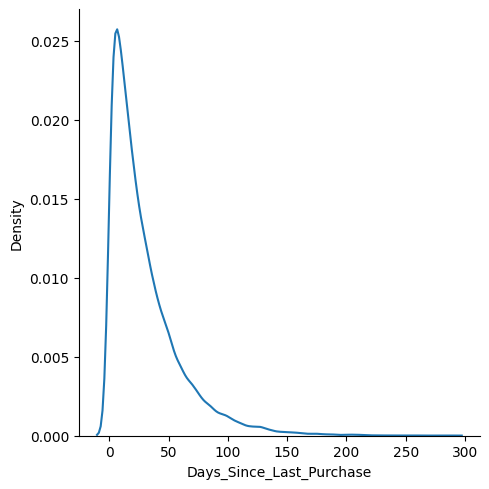

In [86]:
sns.displot(data=df,x=df['Days_Since_Last_Purchase'],kind='kde')

In [87]:
df['Days_Since_Last_Purchase']=df['Days_Since_Last_Purchase'].fillna(df['Days_Since_Last_Purchase'].median())

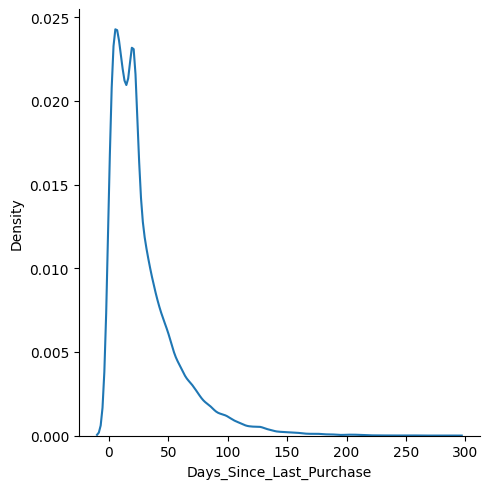

In [88]:
sns.displot(data=df,x=df['Days_Since_Last_Purchase'],kind='kde')

## Discount_Usage_Rate

filled missing with the mean value  
almost normally distributed 

In [89]:
df['Discount_Usage_Rate'].isnull().sum()

np.int64(3500)

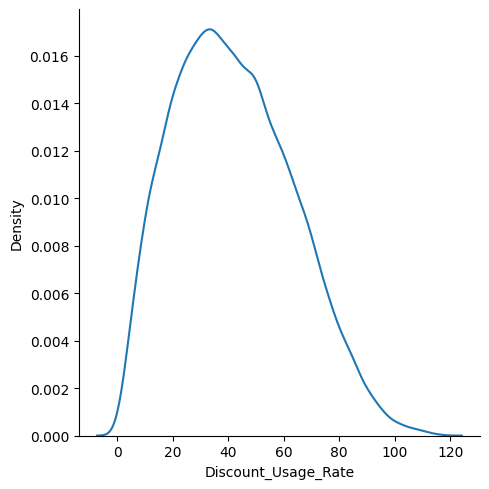

In [90]:
sns.displot(data=df,x=df['Discount_Usage_Rate'],kind='kde')

In [91]:
df['Discount_Usage_Rate']

0        46.40
1        57.96
2        12.24
3        44.10
4        25.20
         ...  
49995    62.70
49996    66.30
49997      NaN
49998    74.20
49999     2.90
Name: Discount_Usage_Rate, Length: 50000, dtype: float64

In [92]:
df['Discount_Usage_Rate']=df['Discount_Usage_Rate'].fillna(df['Discount_Usage_Rate'].mean())

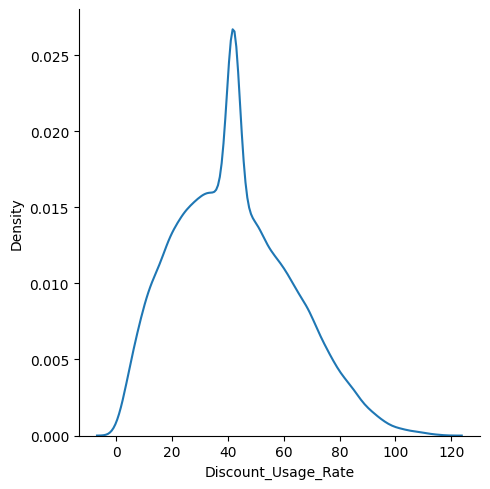

In [93]:
sns.displot(data=df,x=df['Discount_Usage_Rate'],kind='kde')

In [94]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Return rate

In [95]:
df['Returns_Rate'].isnull().sum()

np.int64(4491)

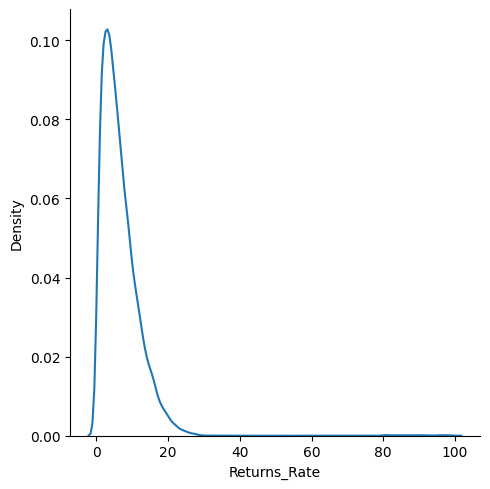

In [96]:
sns.displot(data=df,x=df['Returns_Rate'],kind='kde')

In [97]:
df['Returns_Rate']=df['Returns_Rate'].fillna(df['Returns_Rate'].mean())

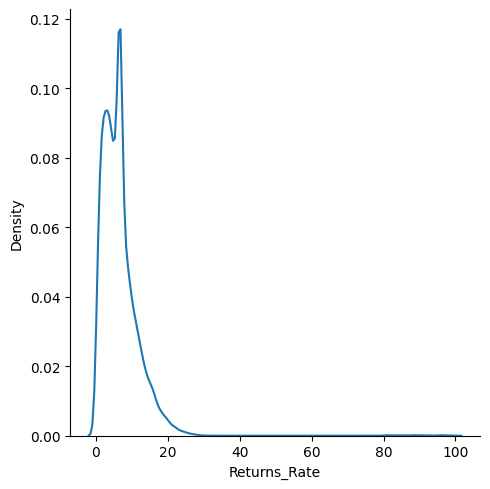

In [98]:
sns.displot(data=df,x=df['Returns_Rate'],kind='kde')

## Email open rate


In [99]:
df['Email_Open_Rate'].isnull().sum()

np.int64(2528)

In [100]:
df['Email_Open_Rate']=df['Email_Open_Rate'].fillna(df['Email_Open_Rate'].mean())

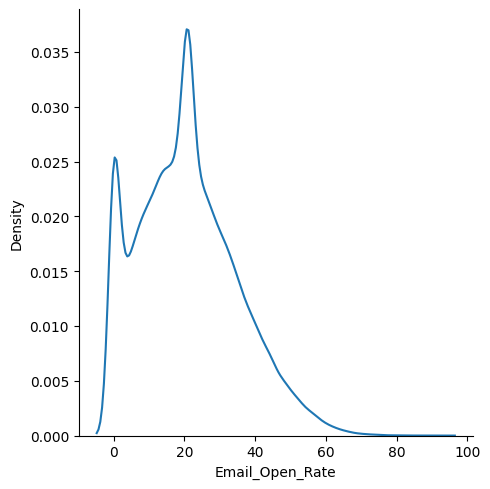

In [101]:
sns.displot(data=df,x=df['Email_Open_Rate'],kind='kde')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  Int32  
 1   City                           50000 non-null  object 
 2   Membership_Years               50000 non-null  float64
 3   Login_Frequency                50000 non-null  float64
 4   Session_Duration_Avg           50000 non-null  float64
 5   Pages_Per_Session              50000 non-null  float64
 6   Cart_Abandonment_Rate          50000 non-null  float64
 7   Wishlist_Items                 50000 non-null  float64
 8   Total_Purchases                50000 non-null  float64
 9   Average_Order_Value            50000 non-null  float64
 10  Days_Since_Last_Purchase       50000 non-null  float64
 11  Discount_Usage_Rate            50000 non-null  float64
 12  Returns_Rate                   50000 non-null 

## Customer_Service_Calls

In [103]:
df['Customer_Service_Calls'].isnull().sum()

np.int64(168)

In [104]:
df['Customer_Service_Calls']=df['Customer_Service_Calls'].fillna(df['Customer_Service_Calls'].mean())

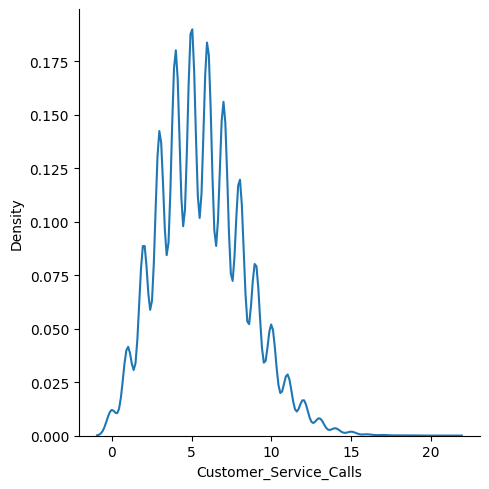

In [105]:
sns.displot(data=df,x=df['Customer_Service_Calls'],kind='kde')

In [106]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Product_Reviews_Written

In [107]:
df['Product_Reviews_Written'].isnull().sum()

np.int64(3500)

In [108]:
df['Product_Reviews_Written']=df['Product_Reviews_Written'].fillna(df['Product_Reviews_Written'].mean())

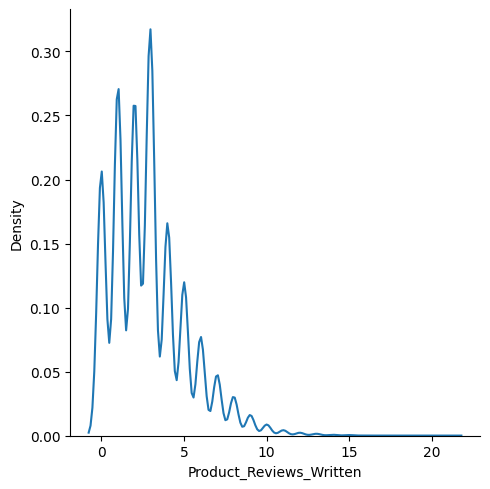

In [109]:
sns.displot(data=df,x=df['Product_Reviews_Written'],kind='kde')

In [110]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Social_Media_Engagement_Score

In [111]:
df['Social_Media_Engagement_Score'].isnull().sum()

np.int64(6000)

In [112]:
df['Social_Media_Engagement_Score']=df['Social_Media_Engagement_Score'].fillna(df['Social_Media_Engagement_Score'].mean())

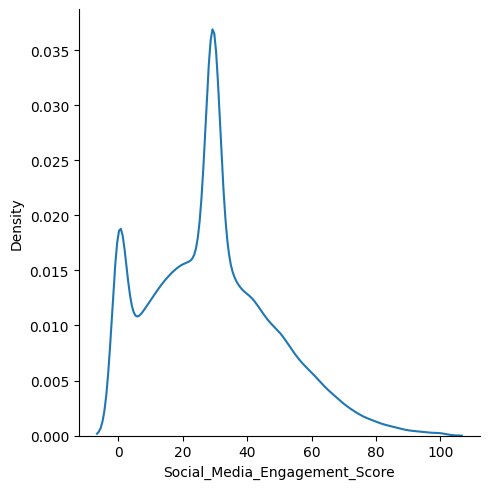

In [113]:
sns.displot(data=df,x=df['Social_Media_Engagement_Score'],kind='kde')

In [114]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Mobile_App_Usage

In [115]:
df['Mobile_App_Usage'].isnull().sum()

np.int64(5000)

In [116]:
df['Mobile_App_Usage']=df['Mobile_App_Usage'].fillna(df['Mobile_App_Usage'].mean())

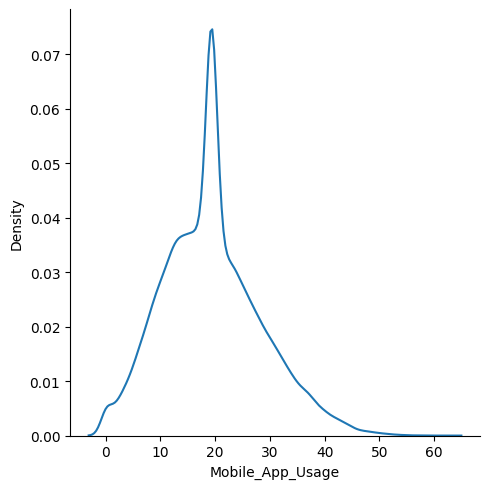

In [117]:
sns.displot(data=df,x=df['Mobile_App_Usage'],kind='kde')

In [118]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Payment_Method_Diversity


In [119]:
df['Payment_Method_Diversity'].isnull().sum()

np.int64(2500)

In [120]:
df['Payment_Method_Diversity']=df['Payment_Method_Diversity'].fillna(df['Payment_Method_Diversity'].mean())

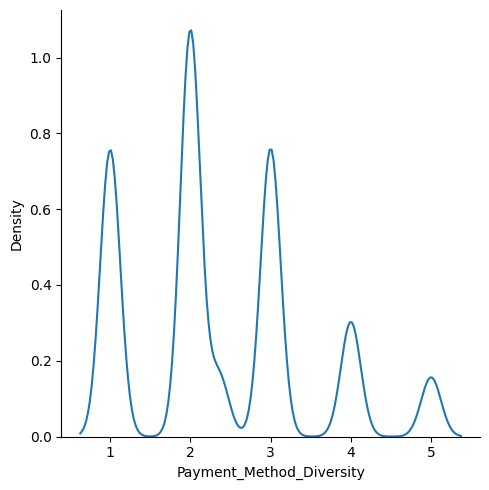

In [121]:
sns.displot(data=df,x=df['Payment_Method_Diversity'],kind='kde')

In [122]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Lifetime_Value

In [123]:
df['Lifetime_Value'].isnull().sum()

np.int64(0)

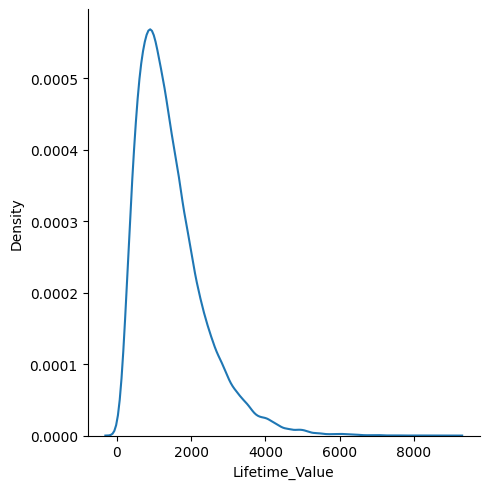

In [124]:
sns.displot(data=df,x=df['Lifetime_Value'],kind='kde')

In [125]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Credit_Balance


In [126]:
df['Credit_Balance'].isnull().sum()

np.int64(5500)

In [127]:
df['Credit_Balance']=df['Credit_Balance'].fillna(df['Credit_Balance'].mean())

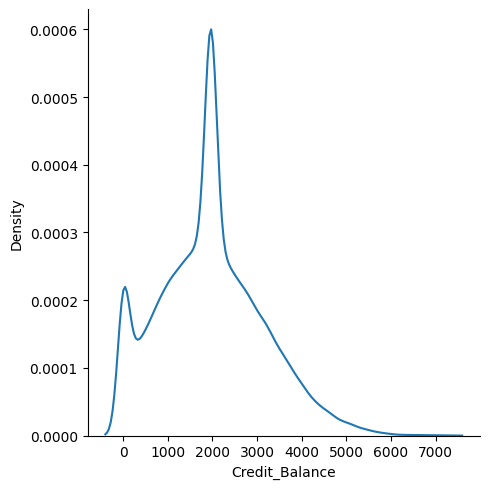

In [128]:
sns.displot(data=df,x=df['Credit_Balance'],kind='kde')

In [129]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

In [130]:
temp_df=df.copy()

In [131]:
temp_df.head()

,Age,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Age_group,Gender_Male,Gender_Other,Country_Canada,Country_France,Country_Germany,Country_India,Country_Japan,Country_UK,Country_USA
0,43,Marseille,2.9,14.0,27.4,6.000000,50.6,3.0,9.0,94.72,34.0,46.40,2.0,17.9,9.0,4.0,16.300000,20.8,1.000000,953.33,2278.0,0,Q1,Middle,True,False,False,True,False,False,False,False,False
1,36,Manchester,1.6,15.0,42.7,10.300000,37.7,1.0,19.5,82.45,71.0,57.96,9.2,42.8,7.0,3.0,29.364466,23.3,3.000000,1067.47,3028.0,0,Q4,Middle,True,False,False,False,False,False,False,True,False
2,45,Vancouver,2.9,10.0,24.8,1.600000,70.9,1.0,9.1,165.52,11.0,12.24,11.5,0.0,4.0,1.0,29.364466,8.8,2.353874,1289.75,2317.0,0,Q4,Middle,False,False,True,False,False,False,False,False,False
3,56,New York,2.6,10.0,38.4,14.800000,41.7,9.0,15.0,147.33,47.0,44.10,5.4,41.4,2.0,5.0,85.900000,31.0,3.000000,2340.92,2674.0,0,Q1,Senior,False,False,False,False,False,False,False,False,True
4,35,Delhi,3.1,29.0,51.4,8.737811,19.1,9.0,32.5,141.30,73.0,25.20,5.5,37.9,1.0,11.0,83.000000,50.4,4.000000,3041.29,5354.0,0,Q4,Middle,True,False,False,False,False,True,False,False,False


In [132]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

In [ ]:
df.drop(columns=['City','Signup_Quarter'],inplace=True)

In [134]:
df.drop(columns=['Age_group'],inplace=True)

In [135]:
df.columns

Index(['Age', 'Membership_Years', 'Login_Frequency', 'Session_Duration_Avg',
       'Pages_Per_Session', 'Cart_Abandonment_Rate', 'Wishlist_Items',
       'Total_Purchases', 'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Gender_Male', 'Gender_Other', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_India', 'Country_Japan',
       'Country_UK', 'Country_USA'],
      dtype='object')

In [136]:
df.corr()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Gender_Male,Gender_Other,Country_Canada,Country_France,Country_Germany,Country_India,Country_Japan,Country_UK,Country_USA
Age,1.000000,-0.004615,-0.004155,-0.001418,0.001161,0.000089,0.003679,-0.003946,-0.005474,0.000414,-0.001003,-0.011332,0.005452,0.001933,-0.001728,-0.001590,0.000449,0.002659,-0.001413,-0.004272,-0.100511,-0.000865,-0.000174,-0.001782,0.004500,-0.004376,0.012642,-0.003477,-0.007278,0.004053
Membership_Years,-0.004615,1.000000,0.002305,0.006824,0.003568,-0.000698,0.005526,-0.022968,0.000680,-0.002569,0.004860,-0.036164,0.003795,-0.005242,0.004071,0.000269,0.002495,-0.004385,0.003583,0.007694,-0.000623,0.003461,-0.000612,0.009068,0.003338,-0.001527,-0.002395,0.003405,-0.005633,-0.003902
Login_Frequency,-0.004155,0.002305,1.000000,0.682312,0.654798,-0.624929,0.573891,0.588153,0.008432,0.003934,-0.002555,0.005275,0.579767,-0.373131,0.527255,0.547920,0.640074,0.006257,0.499324,0.477028,-0.204379,-0.009102,-0.000383,-0.006249,0.002198,0.006217,0.005453,0.008574,0.000929,-0.007544
Session_Duration_Avg,-0.001418,0.006824,0.682312,1.000000,0.711249,-0.672624,0.625641,0.637161,0.001829,-0.000281,0.002967,0.002112,0.635887,-0.401995,0.570713,0.598296,0.695689,0.001099,0.539295,0.516524,-0.218055,0.002966,0.002052,-0.005748,0.001282,0.002969,0.004304,0.004190,-0.001256,-0.000092
Pages_Per_Session,0.001161,0.003568,0.654798,0.711249,1.000000,-0.648247,0.596393,0.606764,0.007158,0.001292,0.000447,0.000215,0.605510,-0.387916,0.546641,0.569569,0.665758,-0.000697,0.515568,0.495130,-0.224880,-0.000811,0.001025,-0.007205,0.000902,-0.000949,0.004721,0.003402,0.002002,-0.001048
Cart_Abandonment_Rate,0.000089,-0.000698,-0.624929,-0.672624,-0.648247,1.000000,-0.570522,-0.576277,-0.004015,-0.004515,-0.000622,-0.001060,-0.573632,0.369632,-0.520416,-0.543537,-0.635619,0.000992,-0.495295,-0.469745,0.277963,0.004350,-0.000966,0.000128,-0.008507,-0.000653,-0.004314,-0.005253,0.003773,0.005225
Wishlist_Items,0.003679,0.005526,0.573891,0.625641,0.596393,-0.570522,1.000000,0.538302,-0.002325,0.003781,-0.000584,0.002504,0.536856,-0.337376,0.477609,0.499803,0.585297,0.001029,0.458631,0.433685,-0.189627,-0.000048,0.005625,-0.000514,-0.001176,0.003287,0.006024,0.000317,0.000290,-0.000145
Total_Purchases,-0.003946,-0.022968,0.588153,0.637161,0.606764,-0.576277,0.538302,1.000000,0.003306,0.009253,0.036416,0.273853,0.540090,-0.344929,0.485695,0.510655,0.590596,0.005443,0.622778,0.440637,-0.160029,0.000562,0.006063,-0.004933,0.000760,0.005386,0.005088,-0.000490,-0.000321,-0.003036
Average_Order_Value,-0.005474,0.000680,0.008432,0.001829,0.007158,-0.004015,-0.002325,0.003306,1.000000,-0.000140,-0.000328,0.000366,-0.002776,-0.000912,0.001106,0.000968,0.000547,0.002789,0.151574,0.006859,0.042288,0.008326,-0.004257,0.000224,0.004151,-0.002961,-0.002492,0.000374,0.006766,-0.001056
Days_Since_Last_Purchase,0.000414,-0.002569,0.003934,-0.000281,0.001292,-0.004515,0.003781,0.009253,-0.000140,1.000000,0.001488,0.004879,0.002104,-0.004844,0.005641,0.001398,0.002156,0.001593,0.006921,0.002815,0.148015,-0.003604,0.007421,-0.007392,0.006731,0.002417,0.000643,-0.008125,0.001627,0.000873


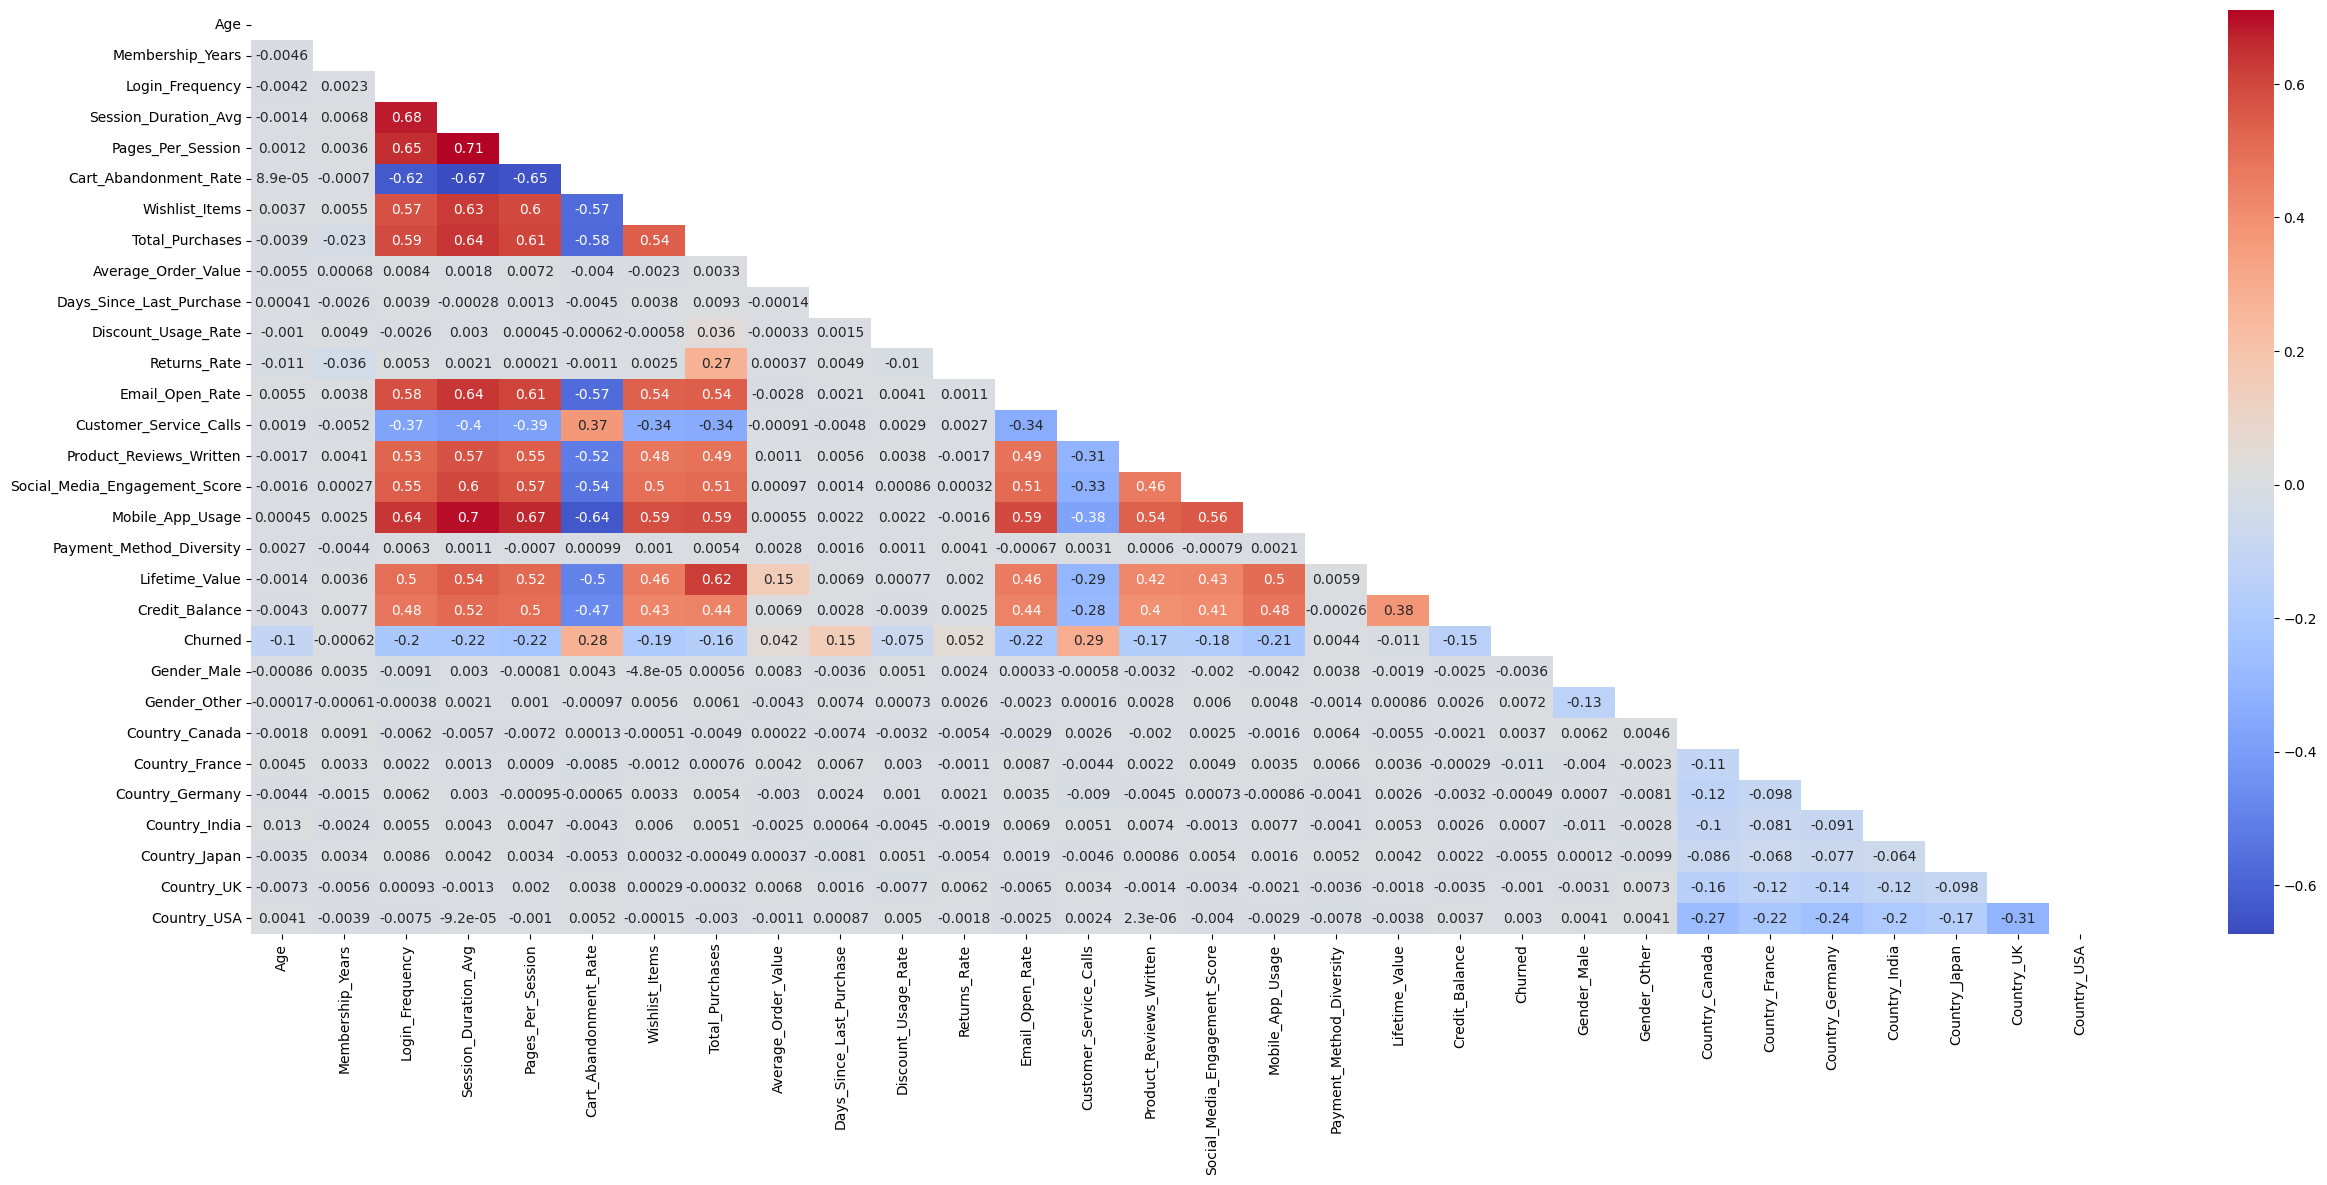

In [137]:
corr_matrix=df.corr()
plt.figure(figsize=(30,12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,annot=True,mask=mask,cmap='coolwarm')
plt.show()

In [138]:
print(corr_matrix['Churned'].sort_values(ascending=False))

Churned                          1.000000
Customer_Service_Calls           0.290545
Cart_Abandonment_Rate            0.277963
Days_Since_Last_Purchase         0.148015
Returns_Rate                     0.051647
Average_Order_Value              0.042288
Gender_Other                     0.007225
Payment_Method_Diversity         0.004412
Country_Canada                   0.003708
Country_USA                      0.002967
Country_India                    0.000696
Country_Germany                 -0.000492
Membership_Years                -0.000623
Country_UK                      -0.001027
Gender_Male                     -0.003593
Country_Japan                   -0.005492
Country_France                  -0.010516
Lifetime_Value                  -0.010684
Discount_Usage_Rate             -0.074523
Age                             -0.100511
Credit_Balance                  -0.147935
Total_Purchases                 -0.160029
Product_Reviews_Written         -0.174614
Social_Media_Engagement_Score   -0

Summary About Correlation matrix with Churn  
1. There doesnot seems issue of multicollinearity  
2. The features like country,lifetime value, gender has very less corelation with the target column Churned  


In [139]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier



In [140]:
X=df.drop("Churned",axis=1)
y=df['Churned']

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [142]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [143]:
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [144]:
y_pred=lr.predict(X_test_scaled)

In [145]:
accuracy_score(y_test,y_pred)

0.7772

In [146]:
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
y_pred_rf=rf.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred_rf))
    

0.915


In [153]:
X_test_scaled.flatten()

array([-0.41576699,  0.87874813, -0.84761602, ..., -0.23283663,
       -0.42131884, -0.73134159], shape=(290000,))

In [152]:
df_plot = pd.DataFrame({
    "X": X_test_scaled.flatten(),
    "y": y_test})

ValueError: array length 290000 does not match index length 10000

In [157]:
import pandas as pd

df_plot = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

In [161]:
df_plot.head()

,Actual,Predicted
33553,0,0
9427,0,0
199,1,1
12447,1,0
39489,0,0


In [159]:
y_test

33553    0
9427     0
199      1
12447    1
39489    0
        ..
28567    1
25079    0
18707    0
15200    0
5857     0
Name: Churned, Length: 10000, dtype: int64

<Axes: >

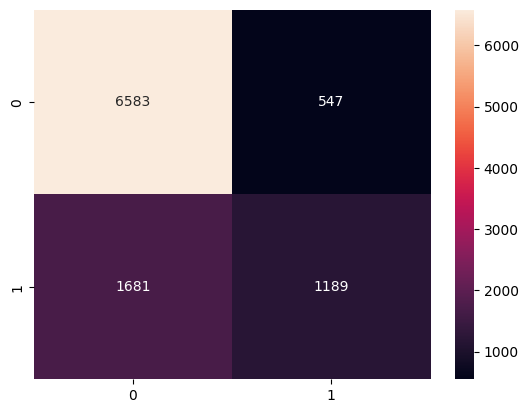

In [173]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

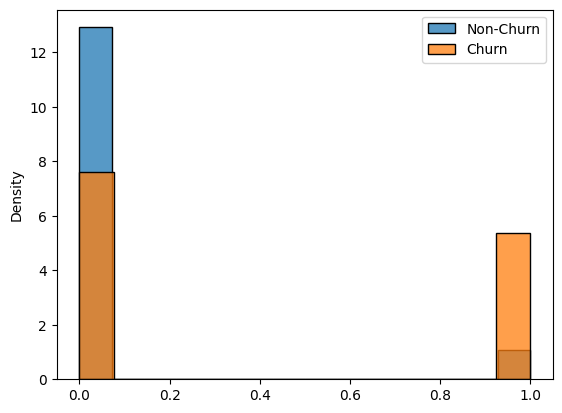

In [172]:
sns.histplot(y_pred[y_test == 0], label="Non-Churn", stat="density")
sns.histplot(y_pred[y_test == 1], label="Churn", stat="density")
plt.legend()

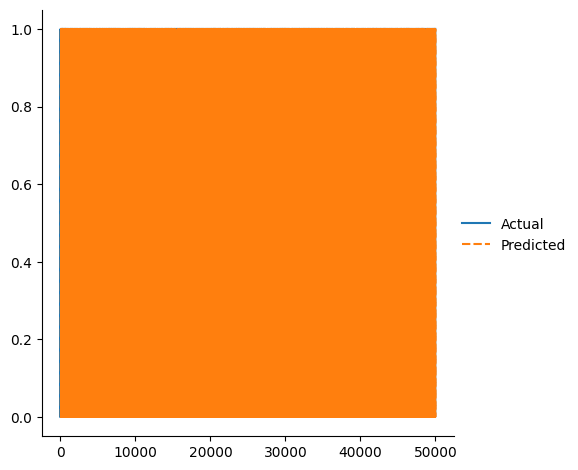

In [158]:

sns.relplot(
    data=df_plot,
    kind="line"
)